## Data Bootcamp Examples
### Working with economic and financial data

Introductory examples for Data Bootcamp, a course at NYU's Stern School of Business designed to give students introduce students to economic and financial data and give  them the tools to work with it effectively (Python plus its data and graphics packages).  The code that follows will be obscure if you're new to Python, but you will be able to do all of this and more by the end of the course.   

### Examples 

* US GDP growth (data from FRED)
* Chinese economic indicators (FRED) 
* US economic indicators (FRED) 
* US labor market conditions (Beveridge curve) (FRED) 
* Government debt (WEO) (Greece, US, Japan, ??) 
* GDP per capita in emerging market economies (World Bank) 
* Emerging market indicators (World Bank?) 
* Stock prices and returns (Yahoo?) 
* Demographics 
* Fama-French equity "factors" (data from Ken French's website)
* S&P 500 ETF (Spyders) (Yahoo finance) 


### About the course

The whole course is on the web:   

* Book:   https://www.gitbook.com/book/davebackus/test/details
* Materials and code:  https://github.com/DaveBackus/Data_Bootcamp 

---

### Example 1: US GDP Growth

Investors -- and others -- keep a close eye on the state of the economy because it affects the performance of firms and financial assets. We'll go into this more extensively later, but for now we want to see what the economy has done in the past, especially the recent past.  We use the wonderful FRED interface ("API") and load the data straight from their website.  Then we graph GDP growth over the past 50 years or so and for a more recent period of greater interest.  

This strategy -- find the data on the web, load it, and produce a graph -- is a model for much of what we do.  

**Question(s).** 
It's always good to know what you're looking for so we'll post question(s) for each example.  Here we 
ask how the economy is doing, and how its current performance compares to the past.

References

* FRED: http://research.stlouisfed.org/fred2/
* Pandas: http://pandas.pydata.org/pandas-docs/stable/
* Data access: http://pandas.pydata.org/pandas-docs/stable/remote_data.html#fred
* Inline plots:  http://stackoverflow.com/questions/21176731/automatically-run-matplotlib-inline-in-ipython-notebook 

*Note to self:* 
The FRED API allows you to import transformations like growth rates directly. Is that possible with Pandas? 

---

In [1]:
# This is an IPython command: it says to put plots here in the notebook, rather than open a separate window.
%matplotlib inline

In [2]:
# anything after the hashtag is a comment 
# load packages 
import datetime as dt 
import pandas.io.data as web       # data import tools 
import matplotlib.pyplot as plt    # plotting tools 

In [3]:
# get data from FRED
fred_series = ["GDPC1"]
start_date = dt.datetime(1960, 1, 1)
data = web.DataReader(fred_series, "fred", start_date)

# print last 3 data points to see what we've got 
print(data.tail(3))                  

              GDPC1
DATE               
2014-10-01  16151.4
2015-01-01  16177.3
2015-04-01  16270.4


In [4]:
# compute annual growth rates 
g = 4*data.pct_change()

# change label   
g.columns = ['US GDP Growth']

In [5]:
# get mean and standard deviation 
gmean = g.mean()
gstd  = g.std() 

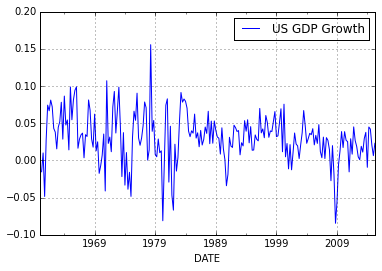

In [6]:
# simple plot 
# note the financial crisis:  GDP fell 8% one quarter (at an annual rate, so really 2%)
g.plot()  

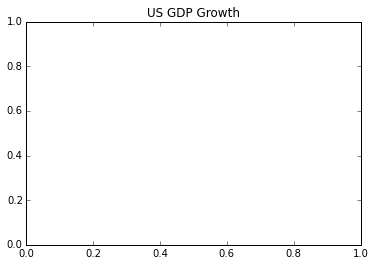

In [8]:
# fix up plot
plt.title('US GDP Growth')
#plt.show() 

In [7]:
# more complex plot, bar chart for last 6 quarters
# put mean 

---

### Example 2: Fama-French equity "factors"

Gene Fama and Ken French are two of the leading academics studying (primarily) equity returns.  Some of this work is summarized in the [press release](http://www.nobelprize.org/nobel_prizes/economic-sciences/laureates/2013/press.html) and related material for the 2013 Nobel Prize in economics, which was shared by Fama with Lars Hansen and Robert Shiller.  For now, it's enough to say that Ken French posts an extensive collection of equity data on his website.  

We'll look at what have come to be called the Fama-French factors.  The data includes:

* xsm:  the return on the market (aggregate equity) minus the riskfree rate
* smb (small minus big):  the return on small firms minus the return on big firms 
* hml (high minus low):  the return on firms with high book-to-market ratios minus those with low ratios. 
* rf:  the riskfree rate.

We download all of these at once, monthly from 1926.  Each is reported as a percentage.
Since they're monthly, you can get a rough annual number if you multiply by 12. 

**Question(s).** 
The question we address is how the returns compare:  their means, their variability, and so on.  
[Ask yourself:  how would I answer this?  What would I like to do with the data?]

References

* http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html
* http://quant-econ.net/pandas.html
* http://pandas.pydata.org/pandas-docs/dev/remote_data.html#fama-french
* http://pandas.pydata.org/pandas-docs/stable/10min.html#selection 
* http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.boxplot
* http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.hist.html 

---

In [8]:
# load packages (if it's redundant it'll be ignored)
import pandas.io.data as web      

# read data from Ken French's website 
ff = web.DataReader('F-F_Research_Data_Factors', 'famafrench')[0] 
# NB:  ff.xs is a conflict, rename to xsm  
ff.columns = ['xsm', 'smb', 'hml', 'rf']

# see what we've got
print(ff.head(3))
print(ff.describe())

         xsm   smb   hml    rf
192607  2.96 -2.30 -2.87  0.22
192608  2.64 -1.40  4.19  0.25
192609  0.36 -1.32  0.01  0.23
               xsm          smb          hml           rf
count  1065.000000  1065.000000  1065.000000  1065.000000
mean      0.653878     0.221850     0.389840     0.283099
std       5.400974     3.221139     3.534641     0.254418
min     -29.130000   -16.400000   -13.280000    -0.060000
25%      -2.020000    -1.560000    -1.290000     0.050000
50%       1.020000     0.060000     0.230000     0.250000
75%       3.660000     1.780000     1.740000     0.430000
max      38.850000    36.700000    35.460000     1.350000


In [9]:
# compute and print summary stats 
moments = [ff.mean(), ff.std(), ff.skew(), ff.kurtosis() - 3]

# \n here is a line break
print('Summary stats for Fama-French factors (mean, std, skew, ex kurt)') #, end='\n\n') 
print(moments)
#[print(moment, end='\n\n') for moment in moments]

Summary stats for Fama-French factors (mean, std, skew, ex kurt)
[xsm    0.653878
smb    0.221850
hml    0.389840
rf     0.283099
dtype: float64, xsm    5.400974
smb    3.221139
hml    3.534641
rf     0.254418
dtype: float64, xsm    0.192321
smb    1.973245
hml    2.147722
rf     1.051113
dtype: float64, xsm     4.771829
smb    16.497750
hml    15.971733
rf     -1.745900
dtype: float64]


In [10]:
# try some things yourself 
# like what?  type ff.[tab]
import pandas as pd
pd.__version__


'0.16.0'

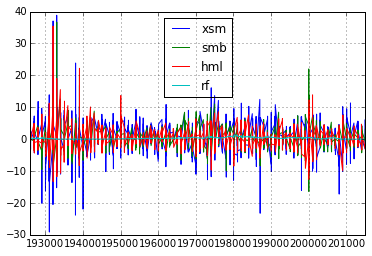

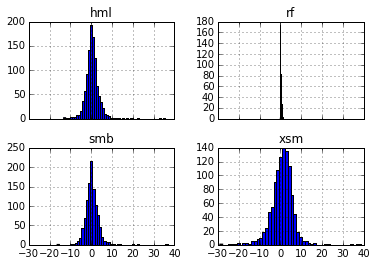

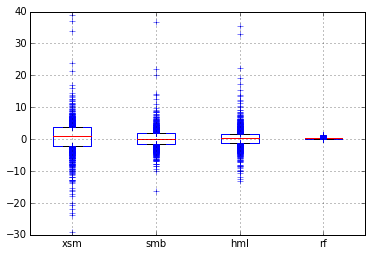

In [11]:
# some plots 
ff.plot()
plt.show()

ff.hist(bins=50, sharex=True)
plt.show()

ff.boxplot(whis=0, return_type='axes')
plt.show()

**Answer(s)?**  Aren't the boxplots in the last figure cool?  The histograms above them?  What do you see in them?  How do the various returns compare?   

---

### Example 3: GDP per capita and life expectancy

The World Bank collects a broad range of economic and social indicators for most countries in the World.  They also have a nice interface.  It's a good source for basic information about the economic climate compares across countries.  

We illustrate its usefulness with a scatterplot of life expectancy v GDP per capita.  

**Question(s).**  How closely are these two indicators of quality of life are related.  

**References**

* http://data.worldbank.org/
* http://pandas.pydata.org/pandas-docs/stable/remote_data.html#world-bank
* http://matplotlib.org/examples/shapes_and_collections/scatter_demo.html

---

In [12]:
# load package under name wb 
from pandas.io import wb

# find the codes for the variables of interest 
wb.search
wb.search(string='gdp.*capita').iloc[:2]

,id,name,source,sourceNote,sourceOrganization,topics
699,6.0.GDPpc,GDP per capita (2011 US$),LAC Equity Lab,GDP per capita is gross domestic product divid...,b'LAC Equity Lab Tablulations of the World Dev...,Economy & Growth
700,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation...",LAC Equity Lab,GDP per capita based on purchasing power parit...,b'NULWorld Development Indicators (World Bank)L',Economy & Growth


In [13]:
# specify dates, variables, and countries 
start = 2011
# GDP per capita, population, life expectancy
variable_list = ['NY.GDP.PCAP.KD', 'SP.POP.TOTL', 'SP.DYN.LE00.IN']
country_list  = ['US', 'FR', 'JP', 'CN', 'IN', 'BR', 'MX'] 

# Python understands we need to go to the second line because ( hasn't been closed by )
data = wb.download(indicator=variable_list, 
                   country=country_list, start=start, end=start).dropna()

# see what we've got
print(data)

                    NY.GDP.PCAP.KD  SP.POP.TOTL  SP.DYN.LE00.IN
country       year                                             
Brazil        2011     5721.289504    196935134       73.347366
China         2011     3121.969744   1344130000       75.042000
France        2011    35771.547550     65343588       82.114634
India         2011     1086.048597   1221156319       65.958488
Japan         2011    36203.430066    127817277       82.591220
Mexico        2011     8307.686996    119361233       76.914171
United States 2011    44341.811840    311582564       78.641463


In [14]:
# check the column labels, change to something simpler 
print(data.columns)
data.columns = ['gdppc', 'pop', 'le']
print(data)

Index(['NY.GDP.PCAP.KD', 'SP.POP.TOTL', 'SP.DYN.LE00.IN'], dtype='object')
                           gdppc         pop         le
country       year                                     
Brazil        2011   5721.289504   196935134  73.347366
China         2011   3121.969744  1344130000  75.042000
France        2011  35771.547550    65343588  82.114634
India         2011   1086.048597  1221156319  65.958488
Japan         2011  36203.430066   127817277  82.591220
Mexico        2011   8307.686996   119361233  76.914171
United States 2011  44341.811840   311582564  78.641463


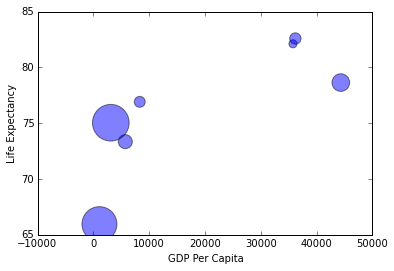

In [15]:
# scatterplot
# life expectancy v GDP per capita 
# size of circles controlled by population 

# load packages (ignored if redundant) 
import numpy as np            
import matplotlib.pyplot as plt

plt.scatter(data['gdppc'], data['le'], s=0.000001*data['pop'], alpha=0.5)
plt.ylabel('Life Expectancy')
plt.xlabel('GDP Per Capita')
plt.show()

In [16]:
# Note:  size of circles based on population 

---

### Example 4: Option prices

A financial option gives its owner the right to buy or sell an asset (the "underlying") at a preset price (the "strike") by a specific date (the "expiration date").  Puts are options to sell, calls are options to buy.  We explore option prices with Yahoo Finance, specifically options on the S&P 500 exchange-traded fund, ticker SPY.  

We illustrate its usefulness with a scatterplot of life expectancy v GDP per capita.  

**Question(s).**  How do put and call prices vary with their strike price?  [Think about this.  What would you expect?] 

**Warning.** This won't work in Python 2.7 or, in fact, in any environment that uses versions of Pandas prior to 0.14.1.  The Yahoo Option API is labeled experimental and it seems the earlier versions don't allow easy access to the strike prices.  

**References**

* http://finance.yahoo.com/q/op?s=SPY+Options
* http://pandas.pydata.org/pandas-docs/stable/remote_data.html#yahoo-finance
* http://pandas.pydata.org/pandas-docs/stable/remote_data.html#yahoo-finance-options

---

In [17]:
# load packages 
import pandas as pd 
import pandas.io.data as web
from pandas.io.data import Options
import datetime as dt 
import matplotlib.pylab as plt

# ticker 
ticker = 'spy' 

In [18]:
# load stock price first (the underlying) 
# pick a recent date and subtract seven days to be sure we get a quote  
# http://pymotw.com/2/datetime/#date-arithmetic
today = dt.date.today()
one_week = dt.timedelta(days=7)
start = today - one_week
stock = web.DataReader(ticker, 'yahoo', start) 
print(stock)        # just to see what we have

# take the last close (-1 is the last, 'Close' is the close)
# this shows up in our figure 
atm = stock.ix[-1,'Close']      # the -1 takes the last observation   

                 Open       High        Low      Close    Volume  Adj Close
Date                                                                       
2015-04-20  209.06000  210.25000  208.96001  209.85001  82969100  209.85001
2015-04-21  209.85001  210.86000  209.24001  209.60001  67403700  209.60001
2015-04-22  210.00999  210.85001  208.89999  210.63000  77064000  210.63000
2015-04-23  210.14999  211.94000  210.00999  211.16000  99433500  211.16000
2015-04-24  211.66000  211.97000  211.11000  211.64999  57952900  211.64999


In [19]:
# get option prices for same ticker 
option = Options(ticker, 'yahoo')
expiry = dt.date(2014, 11, 20)
data_calls = option.get_call_data(expiry=expiry).dropna()
data_puts  = option.get_put_data(expiry=expiry).dropna()

# check what we have 
print(data_calls.index) 
print(data_calls.tail())

ImportError: html5lib not found, please install it

In [ ]:
# compute mid of bid and ask and arrange series for plotting 
calls_bid = data_calls['Bid']
calls_ask = data_calls['Ask'] 

calls_strikes = data_calls['Strike']
calls_mid = (data_calls['Bid'] + data_calls['Ask'])/2
puts_strikes = data_puts['Strike']
puts_mid = (data_puts['Bid'] + data_puts['Ask'])/2

*Note to self.* 
In older versions of Pandas, prior to 0.14.1, the option input puts the strike in the index, not as a column of data.
The next two lines check the versions of pandas and python on the off chance we want to check:  print(pd.__version__), 
! python --version 

In [ ]:
# plot call and put prices v strike 
plt.plot(calls_strikes, calls_mid, 'r', lw=2, label='calls')
plt.plot(puts_strikes, puts_mid, 'b', lw=2, label='puts')

# prettify it 
#plt.axis([120, 250, 0, 50])
plt.axvline(x=atm, color='k', linestyle='--', label='ATM')               
plt.legend(loc='best')
plt.show()

In [ ]:
# rerun the figure above with different color lines.  Or dashed lines for call and put prices.  
# or change the form of the vertical ATM line:  solid? another color?  
